# Лабораторная работа № 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_excel('2014.xlsx', sheet_name='2013 NYC Benchmark Data')

In [3]:
data.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions,Direct GHG Emissions,Indirect GHG Emissions,Reported Property Floor Area,DOF Property Floor Area,Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4.084010e+09,NaN,4084010096,4453435,NaN,NaN,Queens,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1.005050e+09,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013.0,Filed,...,Yes,ABS,44,1392.3,337.9,1054.4,235370,214110.0,Distribution Center,1.0
2,5017,1.021420e+09,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032.0,Filed,...,No,None,Not Available,673.6,541.8,131.8,64806,64816.0,Multifamily Housing,1.0
3,5116,1.021750e+09,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040.0,Filed,...,No,None,Not Available,485,403,82,62839,62847.0,Multifamily Housing,1.0
4,363,1.003360e+09,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002.0,Filed,...,No,None,Not Available,435.5,290,145.5,98000,98052.0,Multifamily Housing,1.0


In [4]:
a = data.columns
for elem in a:
    print(elem)

Record Number
NYC Borough, Block, and Lot (BBL)
Co-reported BBL Status
BBLs Co-reported
Reported NYC Building Identificaiton Numbers (BINs)
Street Number
Street Name
Borough
Zip Code
DOF Benchmarking Submission Status
Site EUI
Weather Normalized Site EUI
Source EUI
Weather Normalized Source EUI
Municipally Supplied Potable Water
Automatic Water Benchmarking Eligible
Reported Water Method
ENERGY STAR Score
Total GHG Emissions
Direct GHG Emissions
Indirect GHG Emissions
Reported Property Floor Area
DOF Property Floor Area
Primary Property Type - Self Selected
DOF Number of Buildings


In [5]:
df = data[['Borough','Site EUI','Source EUI', 'Municipally Supplied Potable Water',
           'Total GHG Emissions','Weather Normalized Site EUI','DOF Property Floor Area','ENERGY STAR Score']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16170 entries, 0 to 16169
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Borough                             16170 non-null  object 
 1   Site EUI                            12204 non-null  object 
 2   Source EUI                          12204 non-null  object 
 3   Municipally Supplied Potable Water  13790 non-null  object 
 4   Total GHG Emissions                 12380 non-null  object 
 5   Weather Normalized Site EUI         13790 non-null  object 
 6   DOF Property Floor Area             14465 non-null  float64
 7   ENERGY STAR Score                   13790 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1010.8+ KB


In [7]:
df['Site EUI'] = pd.to_numeric(df['Site EUI'], errors='coerce')
df['Source EUI'] = pd.to_numeric(df['Source EUI'], errors='coerce')
df['Municipally Supplied Potable Water'] = pd.to_numeric(df['Municipally Supplied Potable Water'], errors='coerce')
df['Total GHG Emissions'] = pd.to_numeric(df['Total GHG Emissions'], errors='coerce')
df['Weather Normalized Site EUI'] = pd.to_numeric(df['Weather Normalized Site EUI'], errors='coerce')
df['DOF Property Floor Area'] = pd.to_numeric(df['DOF Property Floor Area'], errors='coerce')
df['ENERGY STAR Score']  = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')

<ipython-input-7-ca93f2791cd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Site EUI'] = pd.to_numeric(df['Site EUI'], errors='coerce')
<ipython-input-7-ca93f2791cd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Source EUI'] = pd.to_numeric(df['Source EUI'], errors='coerce')
<ipython-input-7-ca93f2791cd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [8]:
df = df.dropna(subset=['ENERGY STAR Score'])

In [9]:
df.isna().sum()

Borough                                  0
Site EUI                                 0
Source EUI                               0
Municipally Supplied Potable Water    1364
Total GHG Emissions                      3
Weather Normalized Site EUI            433
DOF Property Floor Area                251
ENERGY STAR Score                        0
dtype: int64

In [10]:
df['Weather Normalized Site EUI'].fillna(df['Weather Normalized Site EUI'].mean(), inplace=True)
df['DOF Property Floor Area'].fillna(df['DOF Property Floor Area'].mean(), inplace = True)
df['Total GHG Emissions'].fillna(df['Total GHG Emissions'].mean(), inplace=True)

In [11]:
df = df.drop('Municipally Supplied Potable Water', axis=1)

In [12]:
df.describe()

,Site EUI,Source EUI,Total GHG Emissions,Weather Normalized Site EUI,DOF Property Floor Area,ENERGY STAR Score
count,2.032000e+03,2.032000e+03,2.032000e+03,2.032000e+03,2.032000e+03,2032.000000
mean,1.455490e+04,1.759811e+04,3.451020e+05,1.837841e+04,3.093379e+05,60.830709
std,6.261798e+05,7.533188e+05,1.496069e+07,6.261337e+05,6.099908e+05,29.351834
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.012000e+04,1.000000
25%,5.930000e+01,1.285500e+02,4.160750e+02,6.547500e+01,8.453675e+04,41.000000
50%,8.385000e+01,1.881500e+02,8.235500e+02,1.008000e+02,1.529080e+05,68.000000
75%,1.183000e+02,2.519250e+02,1.932750e+03,2.838250e+02,3.093379e+05,84.000000
max,2.822601e+07,3.395708e+07,6.743665e+08,2.822601e+07,1.343508e+07,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 13783
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Borough                      2032 non-null   object 
 1   Site EUI                     2032 non-null   float64
 2   Source EUI                   2032 non-null   float64
 3   Total GHG Emissions          2032 non-null   float64
 4   Weather Normalized Site EUI  2032 non-null   float64
 5   DOF Property Floor Area      2032 non-null   float64
 6   ENERGY STAR Score            2032 non-null   float64
dtypes: float64(6), object(1)
memory usage: 127.0+ KB


In [14]:
print((df['Site EUI'] > 10**2).sum())
print((df['Site EUI'] > 10**3).sum())
print((df['Site EUI'] > 10**4).sum())
print((df['Site EUI'] > 10**5).sum())

745
32
21
4


In [15]:
df = df.drop(df[df['Site EUI'] > 10**4].index)

In [16]:
print((df['Source EUI'] > 10**2).sum())
print((df['Source EUI'] > 10**3).sum())
print((df['Source EUI'] > 10**4).sum())

1692
13
1


In [17]:
df = df.drop(df[df['Site EUI'] > 10**3].index)

In [18]:
print((df['Total GHG Emissions'] >= 10**5).sum())

3


In [19]:
df = df.drop(df[df['Total GHG Emissions'] > 10**5].index)

In [20]:
print((df['DOF Property Floor Area'] > 10**4).sum())
print((df['DOF Property Floor Area'] > 10**5).sum())
print((df['DOF Property Floor Area'] > 10**6).sum())
print((df['DOF Property Floor Area'] > 10**7).sum())

1997
1357
93
1


In [21]:
df = df.drop(df[df['DOF Property Floor Area'] > 10**6].index)

In [22]:
df.describe()

,Site EUI,Source EUI,Total GHG Emissions,Weather Normalized Site EUI,DOF Property Floor Area,ENERGY STAR Score
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,96.366282,200.903151,1607.642805,4167.438855,212498.089481,61.945378
std,72.819349,134.860779,2734.280631,7608.610018,178558.967749,28.599802
min,0.000000,0.000000,0.000000,0.000000,50120.000000,1.000000
25%,58.275000,126.100000,401.350000,64.450000,81585.500000,43.000000
50%,81.800000,183.800000,767.900000,98.200000,143705.500000,69.000000
75%,113.500000,245.800000,1674.800000,257.725000,309337.897810,85.000000
max,718.600000,2068.100000,48662.500000,18378.408443,999656.000000,100.000000


array([[<AxesSubplot:xlabel='Site EUI', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='Source EUI', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='Total GHG Emissions', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='Weather Normalized Site EUI', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='DOF Property Floor Area', ylabel='Site EUI'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Site EUI'>],
       [<AxesSubplot:xlabel='Site EUI', ylabel='Source EUI'>,
        <AxesSubplot:xlabel='Source EUI', ylabel='Source EUI'>,
        <AxesSubplot:xlabel='Total GHG Emissions', ylabel='Source EUI'>,
        <AxesSubplot:xlabel='Weather Normalized Site EUI', ylabel='Source EUI'>,
        <AxesSubplot:xlabel='DOF Property Floor Area', ylabel='Source EUI'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Source EUI'>],
       [<AxesSubplot:xlabel='Site EUI', ylabel='Total GHG Emissions'>,
        <AxesSubplot:xlabel='Source EUI', ylabel='Total GHG Emissions'>,
        <A

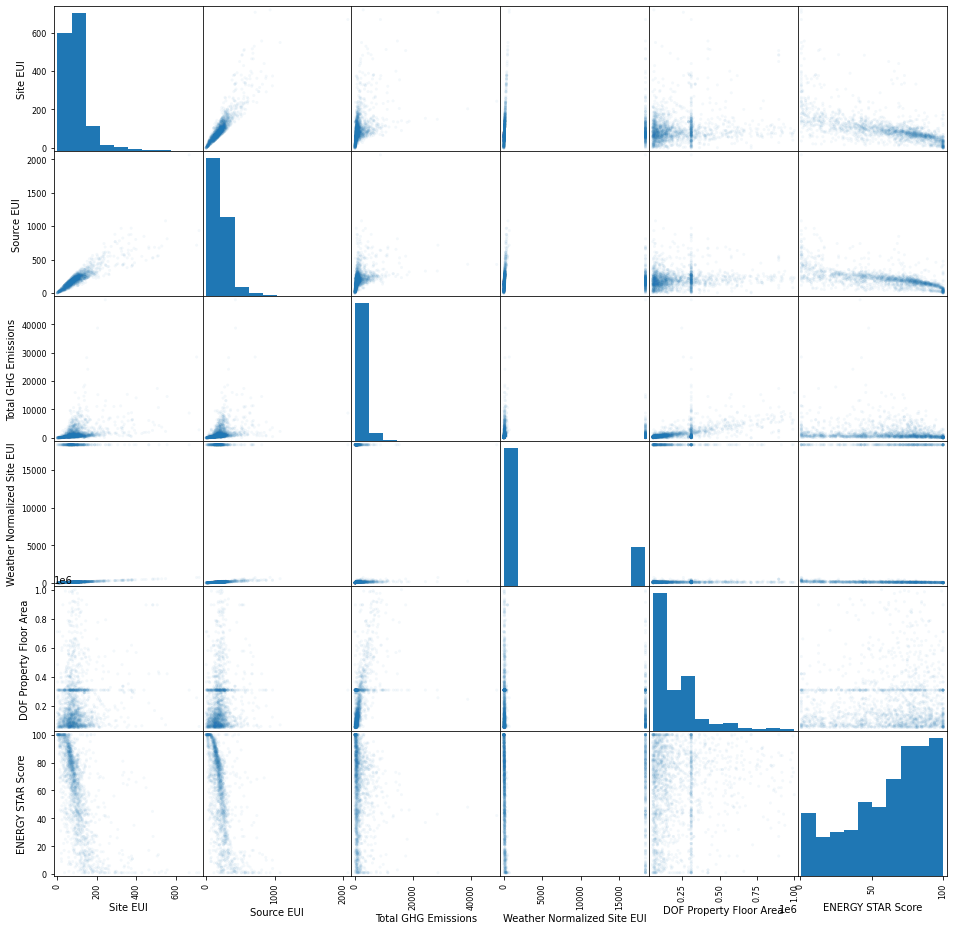

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.05, figsize=(16, 16))

In [24]:
ohc_borough = pd.get_dummies(df['Borough']) 

In [25]:
df = df.drop('Borough', axis=1)

In [26]:
df = pd.concat([df, ohc_borough], axis= 1)

In [27]:
labels = df['ENERGY STAR Score']
df =df.drop(['ENERGY STAR Score'], axis = 1)

In [28]:
labels

1         44.0
5         98.0
7         57.0
11       100.0
15        74.0
         ...  
13768     65.0
13772     29.0
13773     84.0
13778     98.0
13783    100.0
Name: ENERGY STAR Score, Length: 1904, dtype: float64

In [29]:
labels.loc[labels < 70] = 0
labels.loc[labels >= 70] = 1

# Обучение

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
treeCL = DecisionTreeClassifier(max_depth=3,random_state = 17)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                    test_size = 0.3,
                                                   random_state = 42)



In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1332, 10)
(572, 10)
(1332,)
(572,)


In [34]:
treeCL.fit(X_train, y_train)
treeCL.score(X_test, y_test)

0.7937062937062938

In [35]:
predictions = treeCL.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.7937062937062938

In [36]:
from sklearn import tree

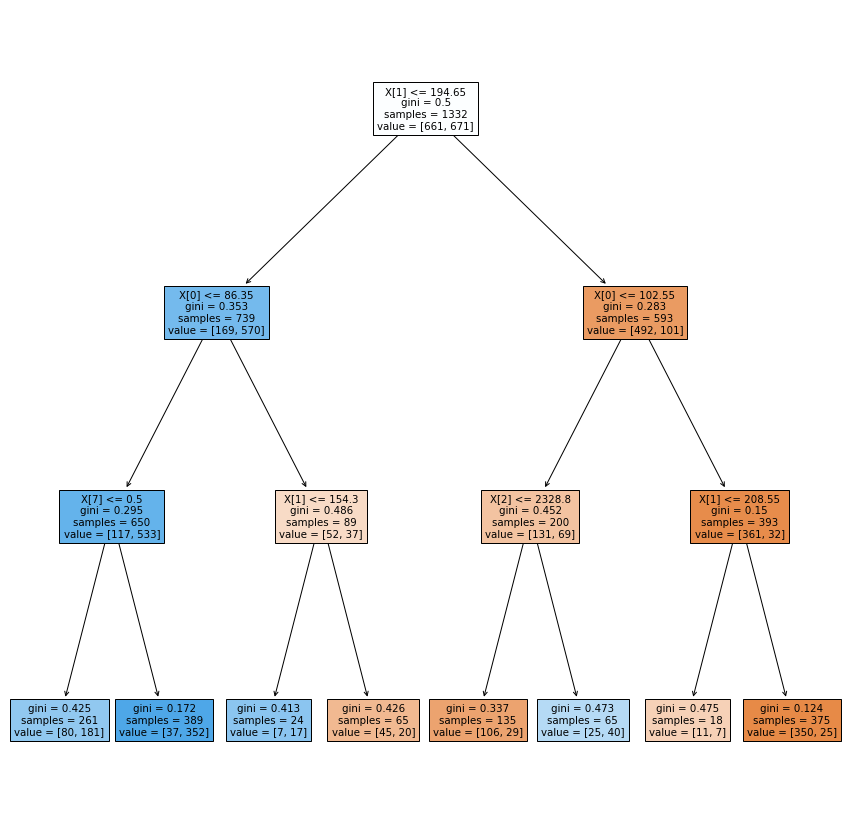

In [37]:
plt.figure(figsize=(15,15))
tree.plot_tree(treeCL, filled=True)
plt.show()

# Случайный лес

In [38]:
from sklearn import ensemble


In [53]:
rf = ensemble.RandomForestClassifier(n_estimators=10, criterion='gini', random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=11)

In [54]:
prediction_rf = rf.predict(X_test)
metrics.accuracy_score(y_test, prediction_rf)

0.7762237762237763

In [55]:
accuracy = []
n_estimators = []

for i in range(2, 20):
    rf = ensemble.RandomForestClassifier(n_estimators=i, criterion='gini', random_state=11)
    rf.fit(X_train, y_train)
    prediction_rf = rf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, prediction_rf))
    n_estimators.append(i)
    

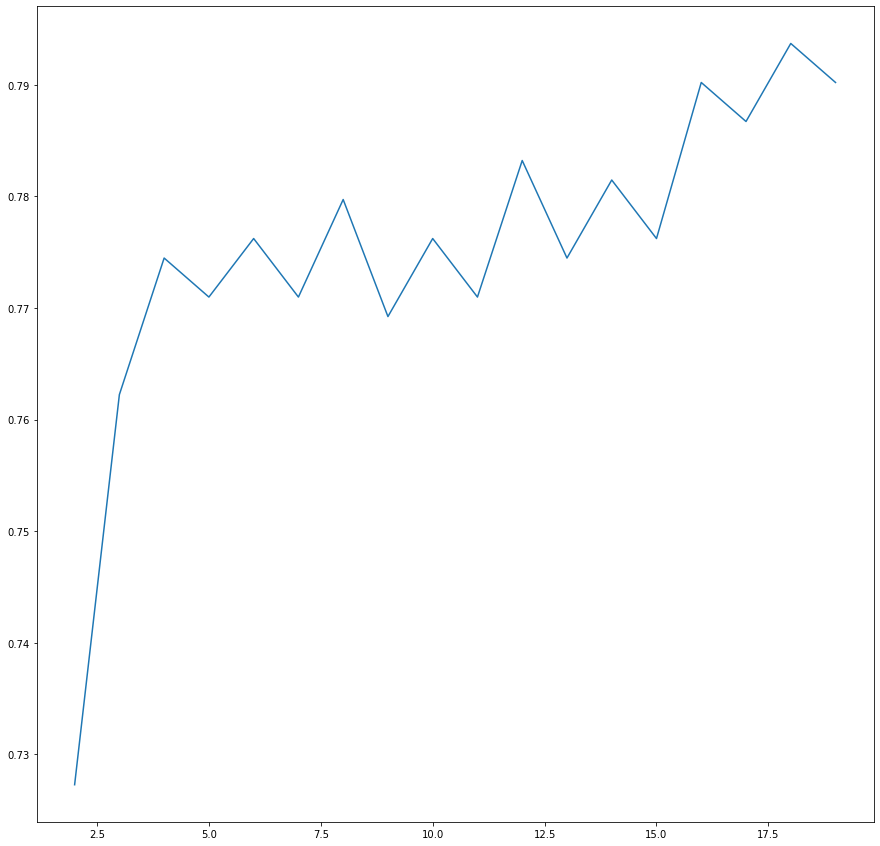

In [62]:
plt.figure(figsize=(15,15))
plt.plot(n_estimators, accuracy)
plt.show()

# Смотрим признаки

In [41]:
import numpy as np

In [42]:
importances = rf.feature_importances_
indexes = np.argsort(importances)[::-1]

In [43]:
for i in range(0, len(indexes)):
    print(df.columns[i], '\t\t\t\t\t', round(importances[i], 4))

Site EUI 					 0.2634
Source EUI 					 0.2949
Total GHG Emissions 					 0.1299
Weather Normalized Site EUI 					 0.147
DOF Property Floor Area 					 0.1088
Bronx 					 0.0069
Brooklyn 					 0.0119
Manhattan 					 0.0207
Queens 					 0.0107
Staten Island 					 0.0058


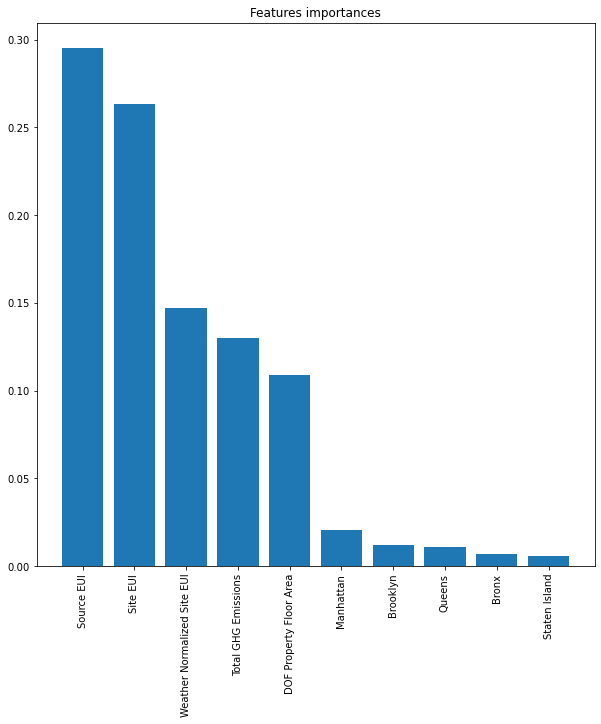

In [44]:
plt.figure(figsize=(10, 10))
plt.title('Features importances')
plt.bar(range(0, len(importances)), importances[indexes])
plt.xticks(range(0, len(importances)), np.array(df.columns)[indexes], rotation = 90)
plt.show()